In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix 

from sklearn.svm import SVC 

In [3]:
df = sb.load_dataset("iris") 
X = df.drop("species", axis=1).values
Y = df["species"].values

In [4]:
svm = SVC(kernel="linear",C=0.1) 
linearModel = svm.fit(X,Y) 
print(linearModel.predict(X[0].reshape(1,-1)))

['setosa']


In [5]:
svm = SVC(kernel="rbf", C=0.1)
rbfModel = svm.fit(X,Y)
print(rbfModel.predict(X[0].reshape(1,-1)))

['setosa']


In [6]:
svm = SVC(kernel="poly", C=1, degree=3)
polyModel = svm.fit(X,Y)
print(polyModel.predict(X[0].reshape(1,-1)))

['setosa']


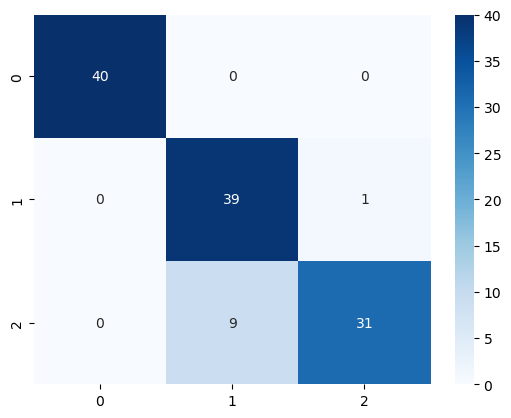

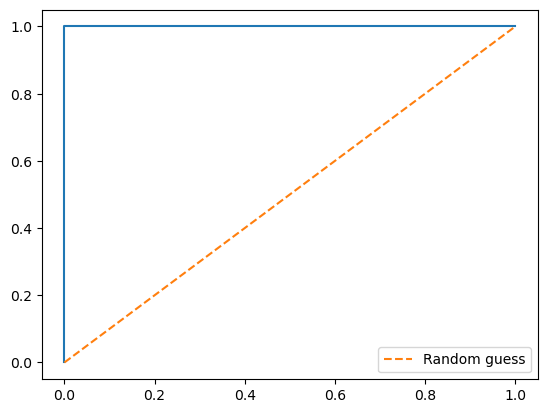

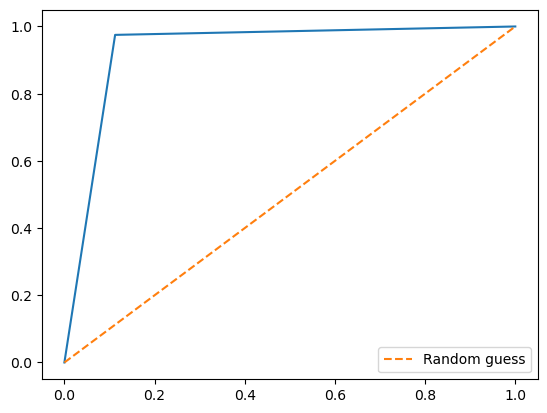

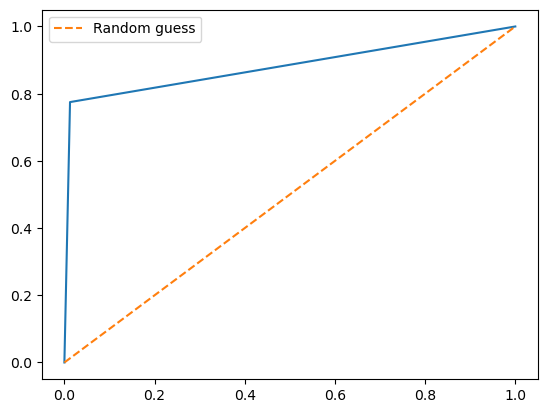

In [7]:
le = LabelEncoder() 
Y = le.fit_transform(Y) 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.2, stratify=Y, random_state=42)

svm = SVC(kernel="rbf", C=1)
rbfModel = svm.fit(X_train,Y_train) 
Y_predict = rbfModel.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predict)
precision = precision_score(Y_test,Y_predict, average="macro")
recall = recall_score(Y_test,Y_predict , average="macro")
f1 = f1_score(Y_test,Y_predict, average="macro") 

cm = confusion_matrix(Y_test,Y_predict) 
sb.heatmap(cm, cmap="Blues",annot=True)

plt.show()

labels = np.unique(Y_test) 
for l in labels :
    Yl_actual = [1 if it==l else 0 for it in Y_test]
    Yl_predict = [1 if it==l else 0 for it in Y_predict]
    
    fpr, tpr, thresholds = roc_curve(Yl_actual,Yl_predict) 
    roc_auc = auc(fpr,tpr) 
    
    plt.plot(fpr, tpr) 
    sb.lineplot(x=[0,1],y=[0,1], linestyle="--",label="Random guess")
    plt.show()